# Clase Práctica 1: Clasificación 📈


----------------------------------

En el aprendizaje de máquinas, la tarea de clasificación consiste en predecir una variable discreta (perteneciente a un conjunto finito de opciones) a partir de una observación, es decir, un conjunto de características. 

La principal diferencia entre problemas de clasificación y regresión, es que en estos últimos los modelos predicen una variable continua (conjunto infinito de posibilidades) a partir de los datos entrada. Así, un ejemplo de un problema de regresión sería predecir el precio de una casa a partir de las características como el tamaño, ubicación, material, etc. De lo contrario, un ejemplo de clasificación sería predecir si el contenido de un correo corresponde a un spam o no. En este caso, como el número de respuestas posibles es igual a 2 (finito), se dice que es un problema de clasificación binaria. 

## Objetivos de la clase 📚

El objetivo principal de esta primera clase práctica es realizar una introducción a la tarea de clasificación en el aprendizaje de máquinas. Para esto, primero implementaremos varios modelos de clasificación para poder relacionar las características fisiológicas de pacientes con la presencia de una enfermedad cardiovascular 🩺. 

Las principales librerías que vamos a utilizar son las siguientes:

- Pandas 🐼: Manejo y análisis de estructuras de datos.
- Scikit-learn: Librería para el aprendizaje de máquina, contiene no sólo modelos clásicos sino que también una serie de funciones que nos permitirán procesar mejor los datos de entrada.
- Numpy: Manejo de operaciones matemáticas.
- Matplotlib y Seaborn: Generación de visualizaciones sobre los datos.

## Metodología

La mayoría de los problemas que se resuelven con aprendizaje de máquinas pueden ser abordados siguiendo 3 pasos principales:

1. Exploración de datos.
2. Selección de modelos.
3. Comparación y análisis de resultados.

A pesar de que en aplicaciones reales existen muchos más pasos intermedios, como el estudio del problema a nivel de negocio y la puesta en producción, estos pasos serán suficientes para abordar los distintos problemas que veremos en este curso.

Así que empecemos! 🥳


## **Clasificación**

**Exploración de datos 🧐**

En la mayoría de los casos, cuando se resuelven problemas con aprendizaje de máquinas solemos trabajar con datos almacenados en formatos de tablas, con extensiones tales como *csv*, *tsv*, *xlsx* o incluso en algunos casos *txt* (más común al trabajar con texto). 

*Pandas* 🐼 es una librería de Python especializada en el manejo de estructuras de datos, la cual nos permite poder cargar, procesar y analizar datos tabulados de manera sencilla. Además, nos entrega muchas funciones que en conjunto con otros librerías de visualización como *Matplotlib* o *Seaborn* nos permite obtener excelentes visualizaciones sobre los datos.

**Importar las librerías**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

**Lectura del dataset**

Con la función `read_csv` podemos cargar datasets que se encuentren en formato csv. Es importante que el nombre de la variable sea lo más simple posible, ya que será utilizado frecuentemente.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fvillena/biocompu/2022/data/cardiovascular_diseases.csv")

La función `head` nos muestra las primeras 5 filas del dataset

In [3]:
df.head()

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
0,45,0,typical_angina,138,236,0,0,152,1,0.2,0,0,fixed_defect,1
1,61,1,typical_angina,120,260,0,1,140,1,3.6,0,1,reversable_defect,0
2,44,0,non_anginal_pain,108,141,0,1,175,0,0.6,0,0,fixed_defect,1
3,77,1,typical_angina,125,304,0,0,162,1,0.0,-1,3,fixed_defect,0
4,35,1,typical_angina,126,282,0,0,156,1,0.0,-1,0,reversable_defect,0


La función `sample(x)` nos entrega x ejemplos del datasets al azar

In [4]:
df.sample(3)

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
13,54,1,typical_angina,124,266,0,0,109,1,2.2,0,1,reversable_defect,0
238,37,0,non_anginal_pain,120,215,0,1,170,0,0.0,-1,0,fixed_defect,1
226,59,1,typical_angina,138,271,0,0,182,0,0.0,-1,0,fixed_defect,1


La función `tail` nos muestra las últimas filas del dataset

In [5]:
df.tail()

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
296,59,0,typical_angina,174,249,0,1,143,1,0.0,0,0,fixed_defect,0
297,52,1,asymptomatic,118,186,0,0,190,0,0.0,0,0,normal,1
298,66,1,typical_angina,120,302,0,0,151,0,0.4,0,0,fixed_defect,1
299,51,1,typical_angina,140,298,0,1,122,1,4.2,0,3,reversable_defect,0
300,57,1,typical_angina,150,276,0,0,112,1,0.6,0,1,normal,0


En aprendizaje de máquinas las filas de un dataset son más conocidas como *instancias*, mientras que las columnas son nuestros *atributos* o *features*. Para acceder al número de instancias y de features utilizamos el atributo `shape`. El primer valor corresponde al número de instancia, mientras que el segundo es el número de atributos.

In [6]:
df.shape 

(301, 14)

El resultado de la celda anterior nos muestra que hay un total de 301 instancias, donde cada una tiene un total de 14 atributos. Para acceder al nombre de cada uno de estos atributos, utilizamos el comando `columns`.

In [7]:
df.columns

Index(['age', 'male', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'high_fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression_by_exercise',
       'slope_st_by_excercise_peak',
       'number_of_vessels_colored_by_flouroscopy', 'thalassemia',
       'cardiovascular_disease'],
      dtype='object')

Según el resultado anterior, tenemos los siguientes datos del paciente: edad, sexo, tipo de dolor de pecho, colesterol, nivel alto de azucar en sangre en ayudo, resultados electrocardiográficos en reposo, frecuencia cardiaca máxica alcanzada, angina inducida por el ejercicio, depresión st por ejercicio, entre otras.

Si queremos información más detallada acerca de estos atributos podemos utilizar la función `info`, la cual nos entrega el nombre, la cantidad de ejemplos no nulos y el tipo de dato de cada columna.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       301 non-null    int64  
 1   male                                      301 non-null    int64  
 2   chest_pain_type                           301 non-null    object 
 3   resting_blood_pressure                    301 non-null    int64  
 4   cholesterol                               301 non-null    int64  
 5   high_fasting_blood_sugar                  301 non-null    int64  
 6   resting_electrocardiographic_results      301 non-null    int64  
 7   maximum_heart_rate_achieved               301 non-null    int64  
 8   exercise_induced_angina                   301 non-null    int64  
 9   st_depression_by_exercise                 301 non-null    float64
 10  slope_st_by_excercise_peak            

Si queremos obtener estadística acerca de cada una de nuestras columnas utilizamos la función `describe`. Esta función nos entrega la cantidad de datos, el promedio, desviación estandar, mínimo, máximo y cuartiles.

In [9]:
df.describe()

,age,male,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,cardiovascular_disease
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,-0.398671,0.734219,0.544850
std,9.110950,0.465534,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.498814
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000,4.000000,1.000000


Un paso fundamental en la exploración de datos es ver que no hayan valores nulos. Para revisar esto de manera rápida, utilizamos la función `isnull`. Esta función analiza celda por celda si existe un valor nulo, en caso que así sea asigna el valor `True`, en caso contrario se coloca el valor `False`.

In [10]:
df.isnull()

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Luego, podemos utilizar la función `sum`, que nos permite sumar los valores que son `True` en cada columna.

In [11]:
df.isnull().sum()

age                                         0
male                                        0
chest_pain_type                             0
resting_blood_pressure                      0
cholesterol                                 0
high_fasting_blood_sugar                    0
resting_electrocardiographic_results        0
maximum_heart_rate_achieved                 0
exercise_induced_angina                     0
st_depression_by_exercise                   0
slope_st_by_excercise_peak                  0
number_of_vessels_colored_by_flouroscopy    0
thalassemia                                 0
cardiovascular_disease                      0
dtype: int64

En este caso no tenemos valores nulos, pero si los tuviéramos es importante que sean reemplazados por algún valor. 

Ahora vamos a analizar nuestro **atributo objetivo**. Este atributo corresponde al valor que nos gustaría predecir a partir de los demás atributos (o parte de ellos). En nuestro caso utilizaremos la columna  *cardiovascular_disease*. Accedamos a ella para ver la naturaleza de los datos.

In [12]:
df["cardiovascular_disease"]

0      1
1      0
2      1
3      0
4      0
      ..
296    0
297    1
298    1
299    0
300    0
Name: cardiovascular_disease, Length: 301, dtype: int64

Al parecer se trata de un atributo con valores 0's y 1's, donde 0 correspondería a que el paciente no presenta enfermedad cardiovascular, mientras que 1 significa que si tiene. Para comprobar esto, utilizamos la función `set` que nos permite ver todos los valores distintos que puede tomar este atributo.

In [13]:
set(df["cardiovascular_disease"])

{0, 1}

Con este resultados podemos concluir que trabajaremos con una clasificación binaria 👀. Otro paso fundamental, es contar la frecuencia de cada uno de los posibles valores pertenecientes a nuestro atributo/variable objetivo. Esto se realiza con la función `value_counts`.

In [14]:
df["cardiovascular_disease"].value_counts()

cardiovascular_disease
1    164
0    137
Name: count, dtype: int64

Podemos ver que los datos están prácticamente balanceados; 164 pacientes presentan una enfermedad cardiovascular, mientras que 137 no tienen. En caso que exista un desbalance, hay que aplicar técnicas especiales de balanceo que veremos más adelante en el curso. Ahora sigamos analizando nuestros datos viendo un ejemplo.

In [15]:
df.sample(1)

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
158,58,1,atypical_angina,120,284,0,0,160,0,1.8,0,0,fixed_defect,0


Podemos ver que las columnas *chest_pain_type* y *thalassemia* son atributos con valores de tipo string (palabras). En aprendizaje de máquinas nuestros algoritmos o sistemas están basados en una serie de operaciones matemáticas sobre los datos, lo cual nos permite entrenar y luego realizar predicciones. Debido a esto, los modelos no pueden trabajar directamente con texto y estos deben ser transformados a números.

La manera más sencilla de realizar esto es utilizando una transformación **One-Hot**. Esto significa que si tenemos un atributo de tipo string, el cual tiene `n` valores distintos, crearemos un total de `n` columnas nuevas con valores numéricos y binarios. Para ejemplificar, si se tiene una columna con los siguientes valores


| chest_pain_type |
|--------|
| asymptomatic |
| non_anginal_pain   |
| typical_angina|
| atypical_angina |

y se transforma utilizando One-Hot Encoding, se generan las siguientes asignaciones columnas:


| chest_pain_type_asymptomatic | chest_pain_type_non_anginal_pain | chest_pain_type_typical_angina | chest_pain_type_atypical_angina |
|------------------------------|----------------------------------|--------------------------------|---------------------------------|
| 1                            | 0                                | 0                              | 0                               |
| 0                            | 1                                | 0                              | 0                               |
| 0                            | 0                                | 1                              | 0                               |
| 0                            | 0                                | 0                              | 1                               |


Así, ya no tenemos que lidiar con valores no numéricos, y la cantidad de características aumenta. Para realizar esta transformación podemos utilizar la función `get_dummies`.

In [16]:
df = pd.get_dummies(df)
df.sample(3)

,age,male,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,cardiovascular_disease,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
53,48,0,130,275,0,1,139,0,0.2,-1,0,1,False,False,True,False,True,False,False
110,64,1,170,227,0,0,155,0,0.6,0,0,1,True,False,False,False,False,False,True
258,57,1,124,261,0,1,141,0,0.3,-1,0,0,False,True,False,False,False,False,True


Un dato que puede ser útil a la hora de analizar datasets, es que los dataframes de pandas nos permiten realizar consultas sobre nuestro dataset con los filtros. Por ejemplo, con el siguiente comando consultamos cuántas personas menores a 40 años presentan una enfermedad cardiovascular.

In [17]:
df[(df["age"] <= 40) & (df["cardiovascular_disease"] == 1)].shape[0]

13

Lo siguiente que podemos hacer, es crear diferentes visualizaciones que nos permitan entender mejor nuestros datos. 

Por ejemplo, si utilizamos la función *box plot* podemos visualizar si es que existen datos alejados del promedio o con un extraño comportamiento en nuestro dataset, más conocidos como outliers.

<Axes: >

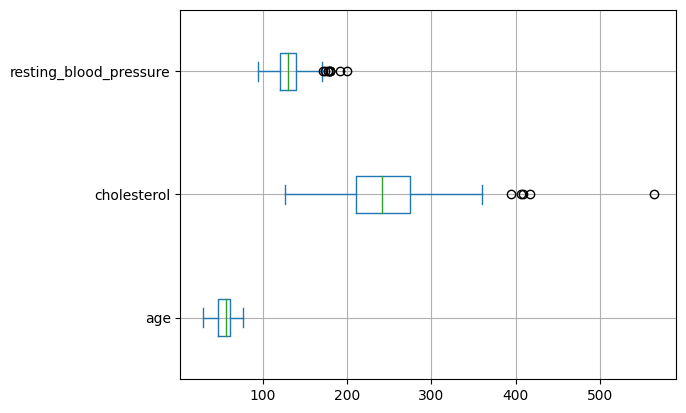

In [18]:
df[['age', 'cholesterol','resting_blood_pressure']].plot.box(vert = False, grid = True)

También podemos utilizar un scatter plot para ver si dos variables tienen una relación lineal o algún otro comportamiento

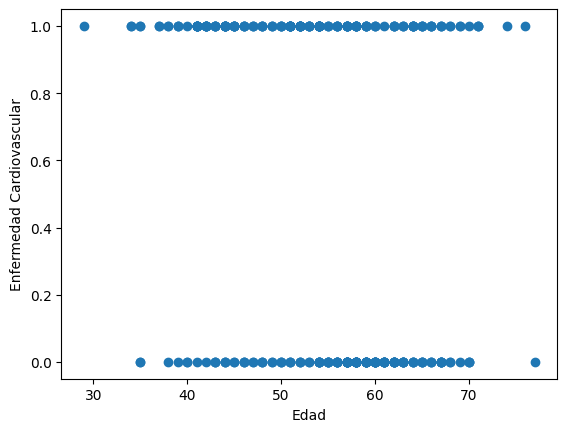

In [19]:
plt.scatter(df['age'], df['cardiovascular_disease'])
plt.xlabel('Edad')
plt.ylabel('Enfermedad Cardiovascular')
plt.show()

Con la función `corr` visualizamos la matriz de correlación entre nuestros atributos

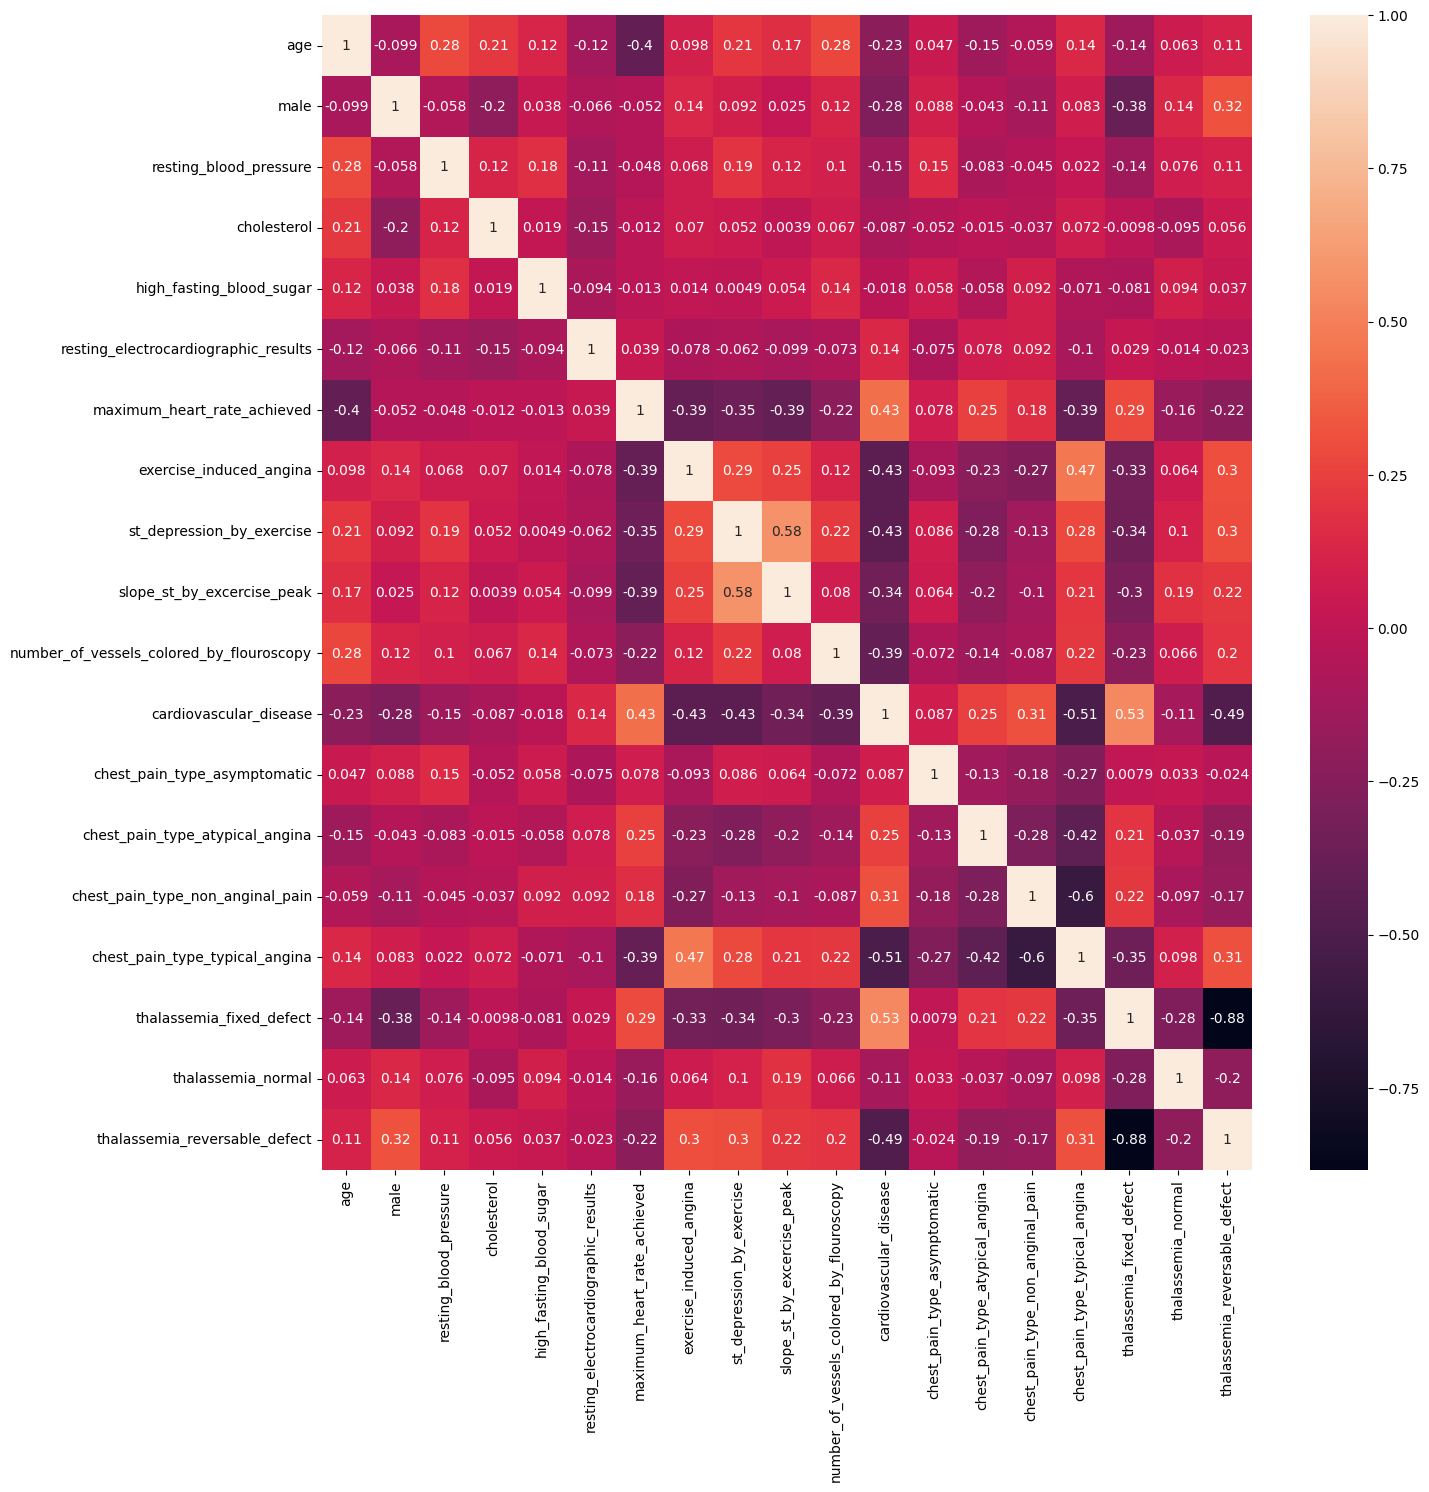

In [20]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(15,15))
ax = sns.heatmap(df[features].corr(), annot=True)

**Entrenamiento de modelos**

Para poder entrenar nuestros modelos de aprendizaje supervisado debemos separar nuestros datos identificando claramente cuál será nuestra variable objetivo, es decir, la que queremos predecir. 

Generalmente se utiliza la variable `X` para los atributos de entrada o features, mientras que la variable `y` es el objetivo.

In [21]:
X = df.drop("cardiovascular_disease", axis=1) # Drop elimina la columna que se especifique, y axis = 1 significa eliminar valores de las columnas

In [22]:
y = df['cardiovascular_disease']

Teniendo ambos vectores, ya podemos entrenar modelos sobre nuestros datos 😄. En particular, veremos 3 modelos: Support Vector Machines (SVM), Decision Tree Classifier (DTC), y Randon Forest (RF).


**LogisticRegression**



La Regresión Logística es un algoritmo de aprendizaje automático utilizado para la clasificación de datos. Su objetivo es predecir la pertenencia a una clase en un problema binario o multiclase.

A diferencia de los modelos de regresión lineal que predicen valores numéricos, la Regresión Logística estima la probabilidad de pertenencia a una clase específica. Utiliza una función sigmoide, que es una curva en forma de "S", para transformar una combinación lineal de las características del dato en un valor entre 0 y 1. Esta transformación representa la probabilidad de que el dato pertenezca a la clase positiva.

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression() # Creamos un objeto de tipo LogisticRegression.
clf.fit(X, y) # Entrenamos el modelo con nuestros vectores X e y

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Luego de que el modelo fue entrenado, podemos hacer  predicciones sobre algún conjunto de datos para así analizar el rendimiento de nuestro clasificador. Este proceso se realiza mediante la función `predict`.

In [27]:
predictions = clf.predict(X)

Para evaluar el rendimiento de nuestro modelo utilizamos la función `accuracy_score`. Esta función nos permite obtener la proporción de ejemplos que fueron correctamente clasificados sobre el total.

In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

In [30]:
print(f'El accuracy obtenido por el modelo LogisticRegression es: {np.round(accuracy_score(y, predictions), 2)}')

El accuracy obtenido por el modelo LogisticRegression es: 0.86


Y listo, hemos entrenado nuestro clasificador y hemos obtenido resultados bastante altos dada la complejidad del problema 🥳 



![Fired!](https://media3.giphy.com/media/3EAYL7KCtZJOJGtli6/giphy.gif?cid=ecf05e47b8ucx71fgr2bny9bn1mf8osjbh2z2grz4c4v4pyd&rid=giphy.gif&ct=g)

Sin embargo, hemos entrenamos el modelo sobre el conjunto de datos `X` e `y` y luego medimos el rendimiento sobre el mismo conjunto `y` original, es decir, no estamos midiendo correctamente el rendimiento del modelo en datos nuevos. Es como si llegaran 10 pacientes a la consulta, aprendemos cuál de ellos tiene o no tiene una enfermedad vascular. Y luego, evaluamos que tan bien clasificamos a los mismos 10 pacientes si tienen o no tienen la enfermedad. Esto no sólo es hacer trampa, sino que nos lleva al problema de **generalización** en aprendizaje de máquinas.

¿Qué es la generalización?

Supongamos que ustedes son unos estudiantes de primer año de universidad. Para poder estudiar para su primer control recolectan los controles realizados en toda la historia del ramo, y con una gran memoria se aprenden de memoria todas las preguntas y respuestas. 

Si al momento de rendir la prueba, aparece alguna de esas mismas preguntas, ustedes obtendrán una buena nota ya que saben la respuesta. Sin embargo, si por alguna razón el profesor decide innovar y crea una nueva pregunta, la nota que obtendrán probablemente será mala, ya que no estaban preparados para una nueva pregunta, un nuevo dato. Eso es lo que ocurre acá, no sabemos si el modelo es capaz de obtener buenos resultados en nuevos datos. 

¿Cómo podemos solucionar esto?

Es importante antes de entrenar un modelo dividir nuestros datos en dos conjuntos; entrenamiento y testeo. El primer conjunto nos servirá para entrenar nuestro modelo, mientras que el segundo nos servirá para medir el rendimiento en datos que con alta probabilidad no fueron vistos anteriormente. Esto nos permite medir el nivel de **generalización** de los modelos.

Más adelante veremos que en la práctica es mejor dividir el conjunto original en 3 particiones; entrenamiento, validación y testeo. Pero por ahora, nos quedaremos con las dos mencionadas. Para generar estos conjuntos lo hacemos con el siguiente código:

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Luego, creamos y entrenamos nuestro modelo sobre el conjunto de entrenamiento.

In [33]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Obtenemos las predicciones sobre el conjunto de test y calculamos el rendimiento.

In [34]:
predictions = clf.predict(X_test)

In [35]:
print(f'El accuracy obtenido por el modelo LogisticRegression es: {np.round(accuracy_score(Y_test, predictions), 2)}')

El accuracy obtenido por el modelo LogisticRegression es: 0.81


In [45]:
# Podemos obtener los indices de los datos que nos permiten crear el hiperplano
coeficientes = clf.coef_[0]
intercepto = clf.intercept_

In [46]:
caracteristicas=list(X_train.columns)

In [63]:

# Combinar los coeficientes y las características
coeficientes_caracteristicas = zip(coeficientes, caracteristicas)

# Ordenar los coeficientes de forma descendente
coeficientes_ordenados = sorted(coeficientes_caracteristicas, key=lambda x: abs(x[0]), reverse=True)


In [64]:
lr_vil = pd.DataFrame(list(coeficientes_ordenados),
             columns=["coef","feature"]
            ).set_index("feature")
lr_vil.sort_values("coef",ascending=False)

,coef
feature,
thalassemia_fixed_defect,0.693382
resting_electrocardiographic_results,0.668552
chest_pain_type_asymptomatic,0.621741
chest_pain_type_non_anginal_pain,0.567462
chest_pain_type_atypical_angina,0.240757
maximum_heart_rate_achieved,0.023719
age,0.014250
thalassemia_normal,0.007797
cholesterol,-0.002394


In [38]:
intercepto

array([0.0646917])

**Decission Tree Classifier**

Método de aprendizaje supervisado que permite resolver tareas de regresión y clasificación. Se llama árbol ya que visualmente parece un árbol invertido, y está compuesto tanto por una raíz, ramas y hojas como veremos más adelante. 

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [49]:
tree = DecisionTreeClassifier( # Instanciamos nuestro árbol de decisión.
    max_depth=3, # Forzamos que nuestro árbol sólo tenga 3 niveles de profundidad.
    random_state = 11
    )
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=11)

In [50]:
tree_predictions = tree.predict(X_test)

In [51]:
print(f'El accuracy obtenido por el modelo Decision Tree es: {np.round(accuracy_score(Y_test, tree_predictions), 2)}')

El accuracy obtenido por el modelo Decision Tree es: 0.79


Una de las ventajas más importantes de los árboles de decisión es la transparencia y explicabilidad del proceso de predicción. Podemos conocer claramente todas las decisiones tomadas por el clasificador y visualizarla en un árbol de decisión.

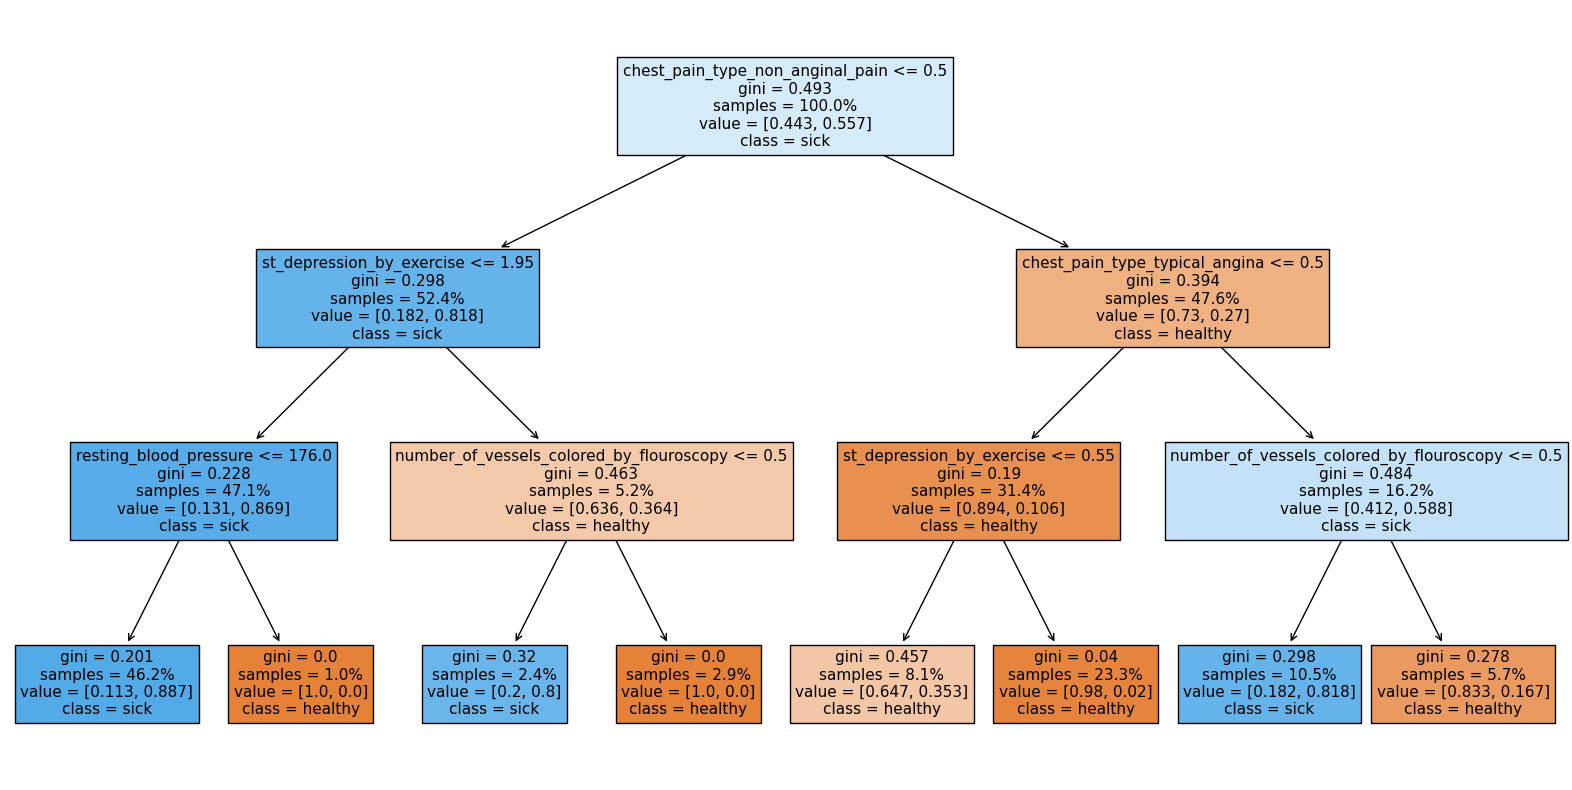

In [54]:
plt.figure(figsize = (20,10))
plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    tree,
    class_names = ["healthy","sick"],
    feature_names = list(df.columns),
    filled=True,
    fontsize=11,
    proportion = True,
    label = "all"
    
    
    )
plt.show()

Como se ve en la figura anterior, este método evalua todas las variables de entrada para seleccionar la mejor salida. La variable más significativa se encontrará en la base del árbol creando una condición, a partir de esto se generan n posibilidades dependiendo la cantidad de posibles valores de la variable objetivo, luego se pasa al siguiente nodo y se repite el proceso, hasta llegar a una hoja.

Para evaluar el nivel de importancia que tienen las caracterñisticas, los algoritmos basados en árboles nos ofrecen la importancia de cada variable al calcular normalmente el Mean Decrease Gini, pueden encontrar más información acá https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

In [55]:
tree_vil = pd.DataFrame(list(zip(df.columns,tree.feature_importances_)),
             columns=["feature","importance"]
            ).set_index("feature")
tree_vil.sort_values("importance",ascending=False)

,importance
feature,
chest_pain_type_non_anginal_pain,0.500333
chest_pain_type_typical_angina,0.165832
number_of_vessels_colored_by_flouroscopy,0.160245
st_depression_by_exercise,0.124629
resting_blood_pressure,0.048962
age,0.000000
male,0.000000
resting_electrocardiographic_results,0.000000
high_fasting_blood_sugar,0.000000


Uno de los hiperparámetros de los árboles de decisión es la profundidad del mismo. Evaluemos cómo se comporta su rendimiento al cambiar la profundidad del árbol.

In [65]:
depths = range(1,10)
performances = []
for depth in depths:
    current_tree = DecisionTreeClassifier( # Instanciamos nuestro árbol de decisión.
    max_depth=depth, # Forzamos que nuestro árbol sólo tenga 3 niveles de profundidad.
    random_state = 11
    )
    current_tree.fit(X_train, Y_train)
    predictions = current_tree.predict(X_test)

    performances.append(accuracy_score(Y_test, predictions))

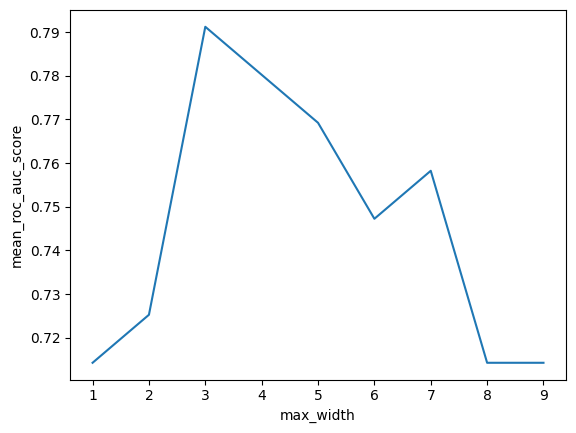

In [66]:
plt.plot(
    depths,
    performances
)
plt.xlabel("max_width")
plt.ylabel("mean_roc_auc_score")
plt.show()

**Random Forest Classifier**

Método basado en el modelo anterior. La idea es que en vez de tener un único árbol, existirán múltiples, de ahí viene el término forest. Dado que cada árbol entrega una clasificación, la clasificación quedará determinada por el valor que contenga más votos. Entre más árboles haya, más robusto y preciso será el algoritmo.

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [69]:
rf_predictions = rf.predict(X_test)

In [70]:
accuracy_score(Y_test, rf_predictions)

0.8241758241758241

In [71]:
rf_vil = pd.DataFrame(list(zip(df.columns,rf.feature_importances_)),
             columns=["feature","importance"]
            ).set_index("feature")
rf_vil.sort_values("importance",ascending=False)

,importance
feature,
chest_pain_type_non_anginal_pain,0.133634
st_depression_by_exercise,0.117454
number_of_vessels_colored_by_flouroscopy,0.109781
maximum_heart_rate_achieved,0.108663
chest_pain_type_typical_angina,0.089827
age,0.071775
resting_blood_pressure,0.068892
cholesterol,0.067270
thalassemia_normal,0.064816


In [72]:
random_tree = rf.estimators_[-3]

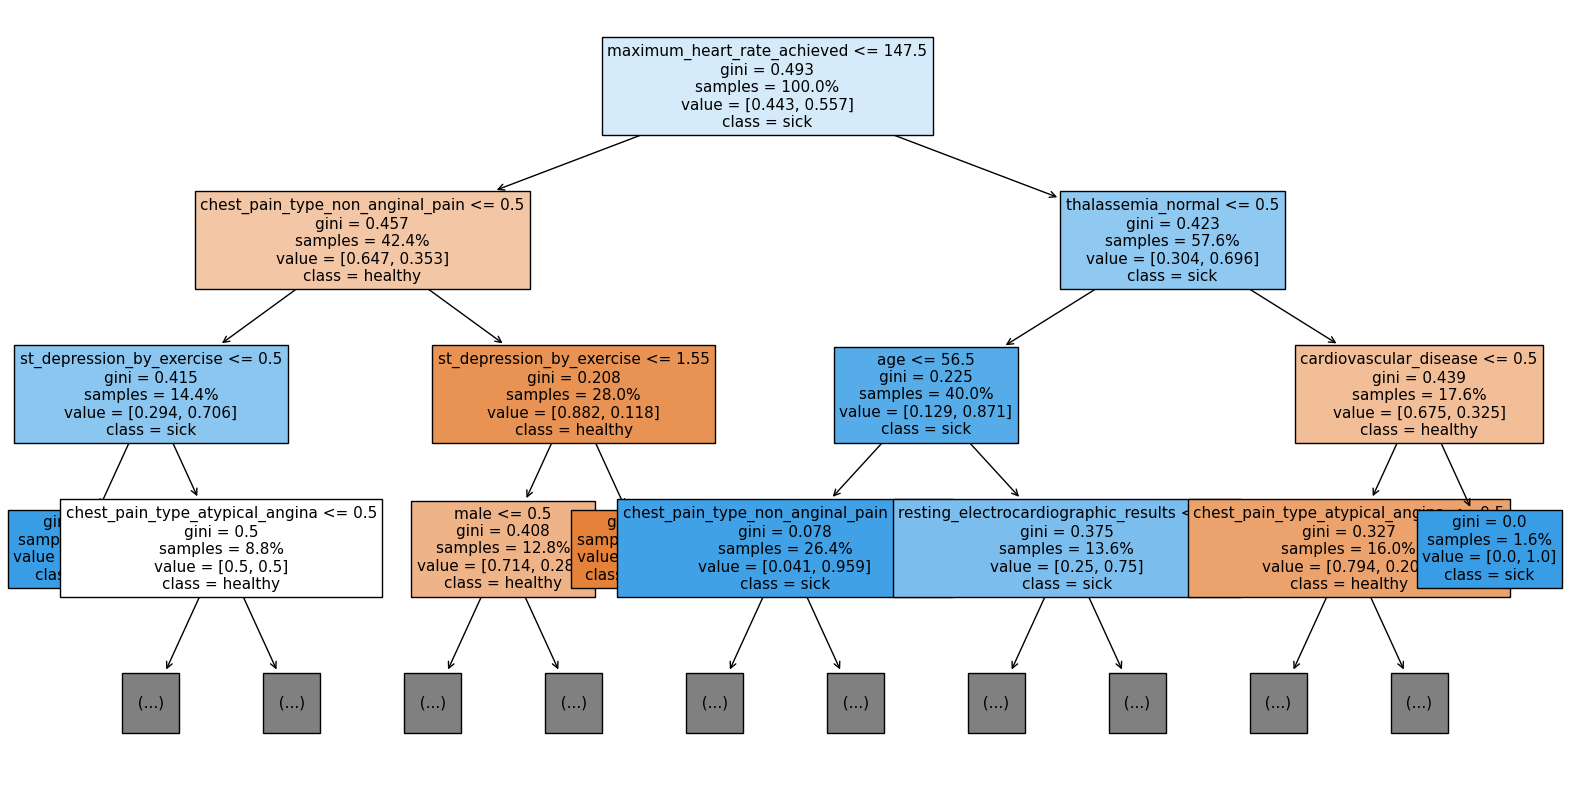

In [75]:
plt.figure(figsize = (20,10))
plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    random_tree, # Objeto de nuestro árbol de decisión entrenado.
    feature_names = list(df.columns), # Nombres de las variables utilizadas para entrenar.
    class_names = ["healthy","sick"], # Nombre de las clases que estamos prediciendo.
    label = "all", # Etiquetamos todas características de cada nodo.
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.,
    max_depth=3 # Profundidad máxima del árbol
)
plt.show()